# Import libraries and glance 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Data loading and initial exploration
df = pd.read_csv('/kaggle/input/restaurant-sales-data/9. Sales-Data-Analysis.csv')
print(df.head())
print(df.info())
print(df.describe())

   Order ID        Date             Product  Price  Quantity Purchase Type  \
0     10452  07-11-2022               Fries   3.49    573.07       Online    
1     10453  07-11-2022           Beverages   2.95    745.76       Online    
2     10454  07-11-2022       Sides & Other   4.99    200.40     In-store    
3     10455  08-11-2022             Burgers  12.99    569.67     In-store    
4     10456  08-11-2022  Chicken Sandwiches   9.95    201.01     In-store    

  Payment Method             Manager    City  
0      Gift Card    Tom      Jackson  London  
1      Gift Card         Pablo Perez  Madrid  
2      Gift Card       Joao    Silva  Lisbon  
3    Credit Card       Walter Muller  Berlin  
4    Credit Card       Walter Muller  Berlin  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254 entries, 0 to 253
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Order ID        254 non-null    int64  
 1   Date 

In [2]:
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
print("=== DATA OVERVIEW ===")
print(f"Dataset shape: {df.shape}")
print(f"Memory usage: {df.memory_usage(deep=True).sum() / 1024:.2f} KB")
print("=== MISSING VALUES ===")
print(df.isnull().sum())
print("=== UNIQUE VALUES PER COLUMN ===")
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")

=== DATA OVERVIEW ===
Dataset shape: (254, 9)
Memory usage: 104.70 KB
=== MISSING VALUES ===
Order ID          0
Date              0
Product           0
Price             0
Quantity          0
Purchase Type     0
Payment Method    0
Manager           0
City              0
dtype: int64
=== UNIQUE VALUES PER COLUMN ===
Order ID: 254 unique values
Date: 53 unique values
Product: 5 unique values
Price: 7 unique values
Quantity: 29 unique values
Purchase Type: 3 unique values
Payment Method: 3 unique values
Manager: 14 unique values
City: 5 unique values


* No missing value at all.Good for you XD

# Data Type Corrections and Feature Engineering

In [3]:
# Convert Date column to datetime
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

# Create additional date features
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['DayOfWeek'] = df['Date'].dt.dayofweek  # 0=Monday, 6=Sunday
df['WeekOfYear'] = df['Date'].dt.isocalendar().week

# Calculate total revenue per order
df['Total_Revenue'] = df['Price'] * df['Quantity']

print("=== DATE RANGE ===")
print(f"From: {df['Date'].min()} to {df['Date'].max()}")
print(f"Total days: {(df['Date'].max() - df['Date'].min()).days + 1}")


=== DATE RANGE ===
From: 2022-11-07 00:00:00 to 2022-12-29 00:00:00
Total days: 53


# EDA

=== PRODUCT ANALYSIS ===


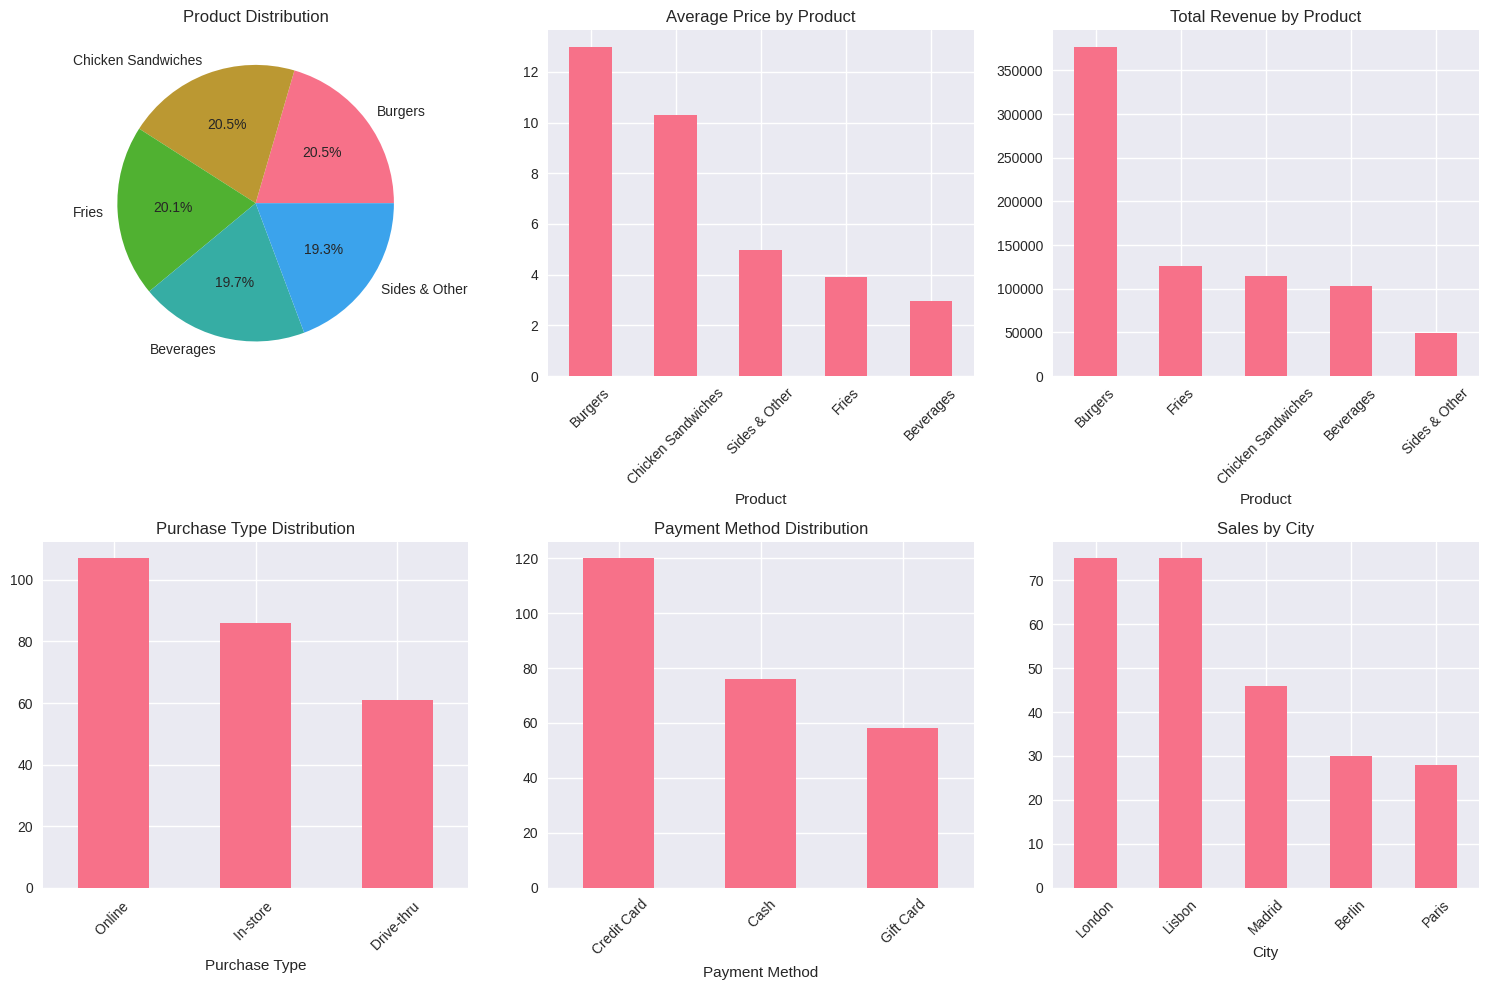

In [4]:
# 1. Product Analysis
print("=== PRODUCT ANALYSIS ===")
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
product_counts = df['Product'].value_counts()
plt.pie(product_counts.values, labels=product_counts.index, autopct='%1.1f%%')
plt.title('Product Distribution')

plt.subplot(2, 3, 2)
avg_price_by_product = df.groupby('Product')['Price'].mean().sort_values(ascending=False)
avg_price_by_product.plot(kind='bar')
plt.title('Average Price by Product')
plt.xticks(rotation=45)

plt.subplot(2, 3, 3)
total_revenue_by_product = df.groupby('Product')['Total_Revenue'].sum().sort_values(ascending=False)
total_revenue_by_product.plot(kind='bar')
plt.title('Total Revenue by Product')
plt.xticks(rotation=45)

# 2. Purchase Type Analysis
plt.subplot(2, 3, 4)
df['Purchase Type'].value_counts().plot(kind='bar')
plt.title('Purchase Type Distribution')
plt.xticks(rotation=45)

# 3. Payment Method Analysis
plt.subplot(2, 3, 5)
df['Payment Method'].value_counts().plot(kind='bar')
plt.title('Payment Method Distribution')
plt.xticks(rotation=45)

# 4. City Analysis
plt.subplot(2, 3, 6)
df['City'].value_counts().plot(kind='bar')
plt.title('Sales by City')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


* All the products are distributed equally 

In [5]:
# Statistical Summary by Categories
print("=== PRICE STATISTICS BY PRODUCT ===")
price_stats = df.groupby('Product')['Price'].agg(['count', 'mean', 'std', 'min', 'max'])
print(price_stats.round(2))

print("=== QUANTITY STATISTICS BY PRODUCT ===")
quantity_stats = df.groupby('Product')['Quantity'].agg(['count', 'mean', 'std', 'min', 'max'])
print(quantity_stats.round(2))

print("=== REVENUE STATISTICS BY PRODUCT ===")
revenue_stats = df.groupby('Product')['Total_Revenue'].agg(['count', 'mean', 'std', 'min', 'max'])
print(revenue_stats.round(2))


=== PRICE STATISTICS BY PRODUCT ===
                    count   mean   std    min    max
Product                                             
Beverages              50   2.95  0.00   2.95   2.95
Burgers                52  12.99  0.00  12.99  12.99
Chicken Sandwiches     52  10.32  2.65   9.95  29.05
Fries                  51   3.92  3.08   3.49  25.50
Sides & Other          49   4.99  0.00   4.99   4.99
=== QUANTITY STATISTICS BY PRODUCT ===
                    count    mean    std     min     max
Product                                                 
Beverages              50  699.66  31.94  677.97  745.76
Burgers                52  558.12  75.30  446.50  754.43
Chicken Sandwiches     52  214.15  25.14  201.01  301.51
Fries                  51  628.12  32.34  573.07  687.68
Sides & Other          49  200.40   0.00  200.40  200.40
=== REVENUE STATISTICS BY PRODUCT ===
                    count     mean      std      min       max
Product                                               

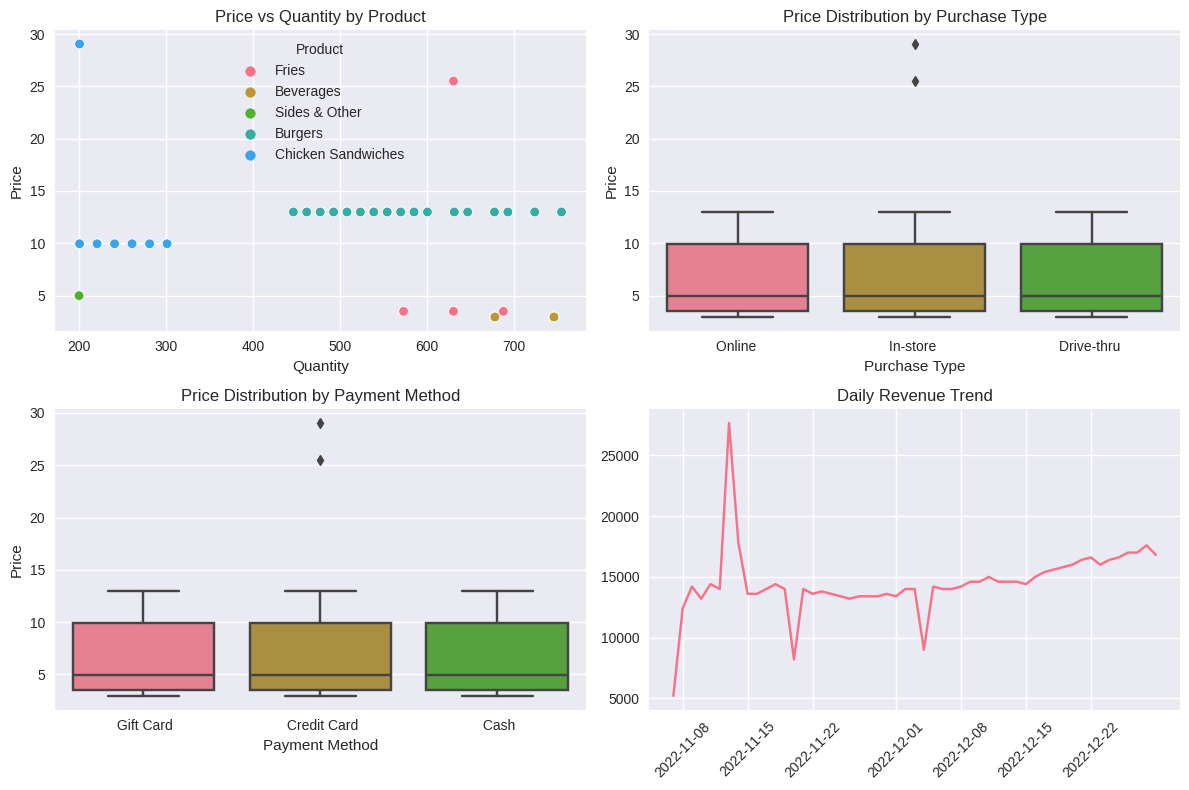

In [6]:
# Correlation Analysis
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
sns.scatterplot(data=df, x='Quantity', y='Price', hue='Product')
plt.title('Price vs Quantity by Product')

plt.subplot(2, 2, 2)
sns.boxplot(data=df, x='Purchase Type', y='Price')
plt.title('Price Distribution by Purchase Type')

plt.subplot(2, 2, 3)
sns.boxplot(data=df, x='Payment Method', y='Price')
plt.title('Price Distribution by Payment Method')

plt.subplot(2, 2, 4)
# Time series analysis
daily_sales = df.groupby('Date')['Total_Revenue'].sum().reset_index()
plt.plot(daily_sales['Date'], daily_sales['Total_Revenue'])
plt.title('Daily Revenue Trend')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


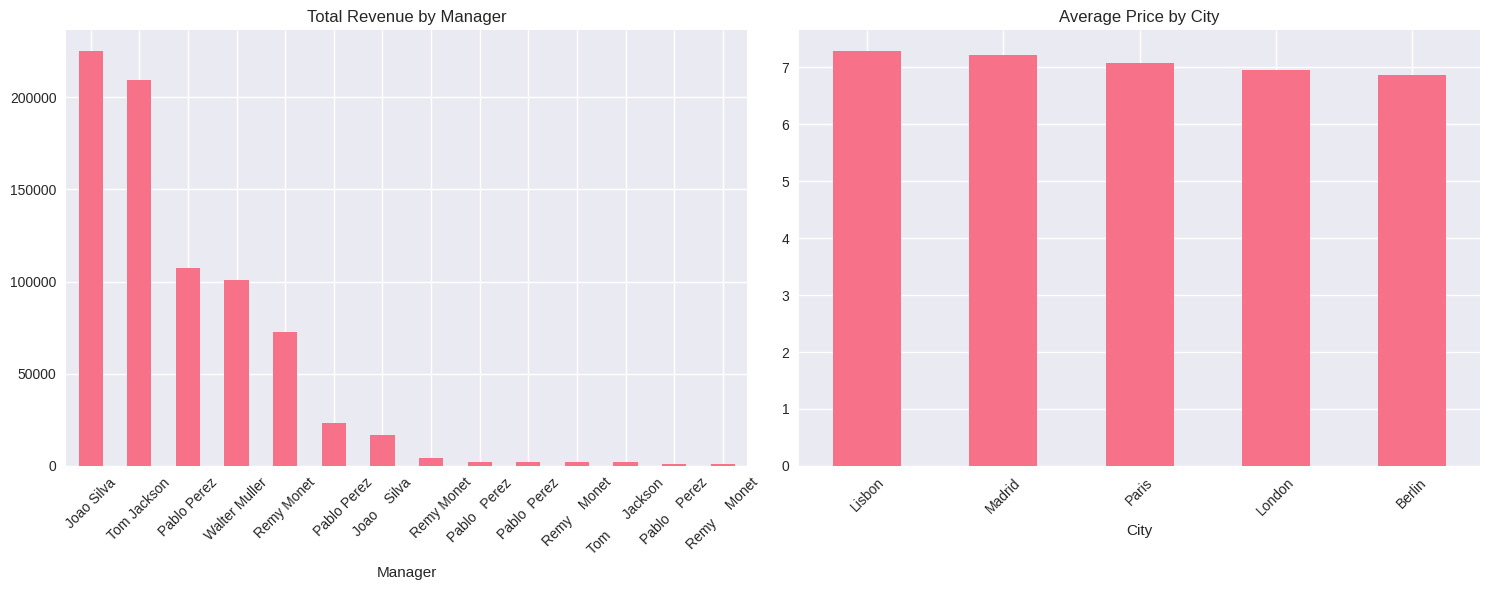

In [7]:
# Manager and City Analysis
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
manager_revenue = df.groupby('Manager')['Total_Revenue'].sum().sort_values(ascending=False)
manager_revenue.plot(kind='bar')
plt.title('Total Revenue by Manager')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
city_avg_price = df.groupby('City')['Price'].mean().sort_values(ascending=False)
city_avg_price.plot(kind='bar')
plt.title('Average Price by City')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


# Data Preprocessing 

In [8]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Create a copy for modeling
df_model = df.copy()

# Handle categorical variables
label_encoders = {}
categorical_columns = ['Product', 'Purchase Type', 'Payment Method', 'Manager', 'City']

for col in categorical_columns:
    le = LabelEncoder()
    df_model[col + '_encoded'] = le.fit_transform(df_model[col])
    label_encoders[col] = le

# Create feature matrix for price prediction
feature_columns = [
    'Quantity', 'Month', 'Day', 'DayOfWeek', 'WeekOfYear',
    'Product_encoded', 'Purchase Type_encoded', 'Payment Method_encoded', 
    'Manager_encoded', 'City_encoded'
]

X = df_model[feature_columns]
y = df_model['Price']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("=== PREPROCESSING COMPLETE ===")
print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")
print(f"Feature columns: {feature_columns}")


=== PREPROCESSING COMPLETE ===
Training set shape: (203, 10)
Test set shape: (51, 10)
Feature columns: ['Quantity', 'Month', 'Day', 'DayOfWeek', 'WeekOfYear', 'Product_encoded', 'Purchase Type_encoded', 'Payment Method_encoded', 'Manager_encoded', 'City_encoded']


# Model and eval

In [9]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42)
}

# Train and evaluate models
results = {}

for name, model in models.items():
    # Train model
    if name == 'Linear Regression':
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
    
    # Calculate metrics
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    
    results[name] = {
        'MAE': mae,
        'RMSE': rmse,
        'R2': r2,
        'Model': model,
        'Predictions': y_pred
    }
    
    print(f"=== {name} RESULTS ===")
    print(f"MAE: ${mae:.2f}")
    print(f"RMSE: ${rmse:.2f}")
    print(f"R²: {r2:.4f}")


=== Linear Regression RESULTS ===
MAE: $2.76
RMSE: $3.64
R²: 0.1810
=== Random Forest RESULTS ===
MAE: $0.36
RMSE: $0.80
R²: 0.9607
=== Gradient Boosting RESULTS ===
MAE: $0.38
RMSE: $0.58
R²: 0.9791


=== MODEL COMPARISON ===
               Model     MAE    RMSE      R2
0  Linear Regression  2.7595  3.6428  0.1810
1      Random Forest  0.3616  0.7984  0.9607
2  Gradient Boosting  0.3776  0.5814  0.9791


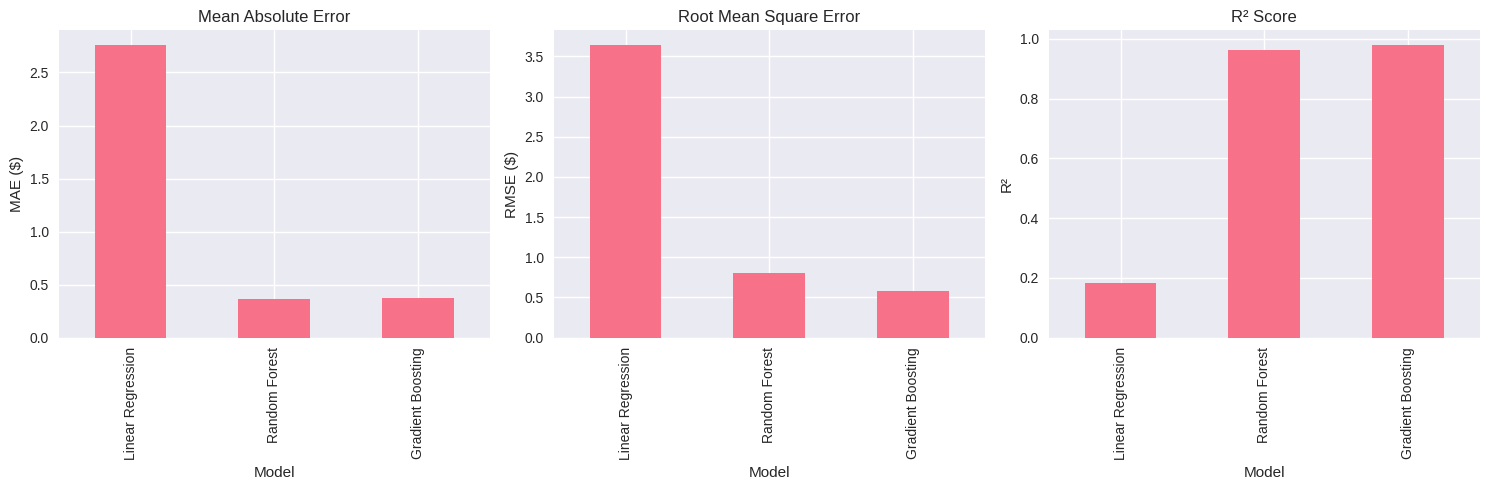

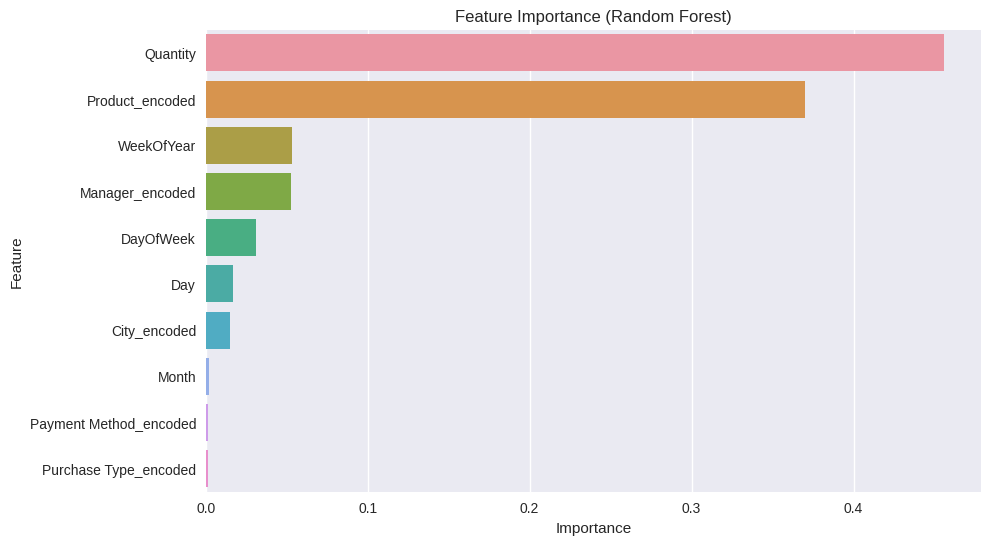

=== TOP 5 MOST IMPORTANT FEATURES ===
           Feature  Importance
0         Quantity    0.455792
5  Product_encoded    0.370176
4       WeekOfYear    0.053413
8  Manager_encoded    0.052572
3        DayOfWeek    0.031059


In [10]:
# Compare models
comparison_df = pd.DataFrame({
    'Model': list(results.keys()),
    'MAE': [results[model]['MAE'] for model in results.keys()],
    'RMSE': [results[model]['RMSE'] for model in results.keys()],
    'R2': [results[model]['R2'] for model in results.keys()]
})

print("=== MODEL COMPARISON ===")
print(comparison_df.round(4))

# Visualize model performance
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
comparison_df.set_index('Model')['MAE'].plot(kind='bar')
plt.title('Mean Absolute Error')
plt.ylabel('MAE ($)')

plt.subplot(1, 3, 2)
comparison_df.set_index('Model')['RMSE'].plot(kind='bar')
plt.title('Root Mean Square Error')
plt.ylabel('RMSE ($)')

plt.subplot(1, 3, 3)
comparison_df.set_index('Model')['R2'].plot(kind='bar')
plt.title('R² Score')
plt.ylabel('R²')

plt.tight_layout()
plt.show()

# Feature importance for tree-based models
if 'Random Forest' in results:
    plt.figure(figsize=(10, 6))
    rf_model = results['Random Forest']['Model']
    feature_importance = pd.DataFrame({
        'Feature': feature_columns,
        'Importance': rf_model.feature_importances_
    }).sort_values('Importance', ascending=False)
    
    sns.barplot(data=feature_importance, x='Importance', y='Feature')
    plt.title('Feature Importance (Random Forest)')
    plt.show()
    
    print("=== TOP 5 MOST IMPORTANT FEATURES ===")
    print(feature_importance.head())


* Quantity is the most effective feature, and it's obvious why! 

# please upvote if it's helped
-------
future works:
* forecasting
* BI
* Deployment